# <center>Survival Analysis </center>

<center>with Lifelines</center>

## <center> A little bit about me</center>


* Data Analyst @ Autodesk
* You can find me at [RaulingAverage.dev](http://raulingaverage.dev/)
* Enjoy Coffee, Learning, and Running..near the beach
As we are aware


**NOTE:**

I hope you and your family are well during these times. Moreover, please be safe as I encourage y’all to Social Distance, Wear Masks, Wash Hands, and of course be well



Also,
This presentation does not reflect any workings or material from Autodesk
I am not a core-contributor to the Lifelines project


## <center> What will we be talking about today? </center>


<font size="8"><b><center> Survival Analysis </center></b></font>

## <center> What is Survival Analysis? </center>


Survival Analysis is used to estimate the time of event of interest for some sample or population. 
[In it’s origination through medical research](https://timesofmalta.com/articles/view/history-of-survival-analysis.705424), one would like to understand the time of death, as random variable time **T** goes on. Since it's origination, the analysis has been used in other applications like customer churn, error logging, or mechanical failure.



As a summary: “Survival analysis attempts to answer questions such as: what is the proportion of a population which will survive past a certain time? Of those that survive, at what rate will they die or fail?” - [Source](https://en.wikipedia.org/wiki/Survival_analysis#Definitions_of_common_terms_in_survival_analysis)


<center>  Why should I consider Survival Analysis?</center>

<center>  Let's look at the customer churn scenario.</center>

Say we have database of Insta2U customers and their subscriptions,a fake a delivery service company for 2U albums. This database has start & ending of subscription dates, and the customer's associated features/signals. 

Because of the start and end date of these customer, we can observe these customer's life expectancies (or their churn) over time **t**, seen below:

Moreover, there are special properties of this implementation we can utilize to ensure we have an accurate depiction of observing the event of interest, in our case churn, over time.


<img src="resources/images/Survival-Curve-1st-Example.png" alt="Survival Curve Example" class="center">


## <center>  What are those special properties?</center>


## <center>  Censoring</center>
* If we look at the following image, we observe one case where people have not experiences some occurence, and continue to persist. ff we take the mean of these data points, we are underestimate the average because those who continue to stay alive after time t, skew our average.

* If we measure average lifespan of sample at some time t, then we cannot identify what the true lifespan is for all individals

* And if we only consider one segmentation of individuals, say those who had their event of occurence happen, we too still underestimate our average of the values.


So, it solves the problem of right-censoring, mentioned later. Even with no censoring, this analysis is still great for understanding time and events of interest.

## <center>  Regression </center>
Because of the censoring component, we implement a different type of regression in comparison to something like Logistic Regression

However, we will not go too much into this topic, as this is a Lightning Talk. 
> Stay tuned for future 2020 talks to go more in depth on that topic

## <center> Okay, I'm convinced. How can we implement this process?  </center>


<img src="https://i.imgur.com/EOowdSD.png" alt="Survival Curve Example" class="center">

<img src="https://i.pinimg.com/originals/70/4e/f2/704ef2f30564853b5c708ad01a2130f9.gif" alt="Survival Curve Example" class="center">



* Lifelines is a [Python package for Survival Analysis](https://lifelines.readthedocs.io/en/latest/) created by [Cam Davidson Pilon](https://github.com/CamDavidsonPilon/lifelines) during his time as a Director of Decision Science at Shopify




```python
from lifelines import KaplanMeierFitter
```



**Benefits**:
* SciKit-Learn friendly
* Built on top of Pandas
* Only focus is survival analysis
* Handles right, left and interval censored data
* Estimating Hazard Rates
* Defining personal Survival Models
* Compare two or more survival functions
    * `lifelines.statistics.logrank_test()`
* and more!

### Survival Function & the Kaplan-Meier Estimate



#### Survival Function

The survival function $S(t)$ estimates the probability of surviving past some time $t$, for the observations going to $t \rightarrow \infty$.

As a definition:

For $T$ be a non-negative random lifetime taken from the population, the survival function  $S(t)$ is defined as 

$$S(t) = \text{Pr}(T>t) = 1-F(t)$$

where $T$ is the response variable, where $T \geq 0$


Including it's properties 

* As t ranges from $0$ to $\infty$, the survival function has the following properties;
    - $S(t)$ is Non-increasing
    - At t=0, S(t) = 1. In other words, the probability of surviving past time $t= 0$ is 1.
        - Moreover, At t=$\infty$, $S(t) = S(\infty)=0$. As time goes to infinity, survival curve goes to 0.
    - $0\leq S(t)\leq 1$
    - $F_T(t) = 1 - S(t)$, where $F_T(t)$ is a "Cumaltive Density function"

### How is the S(t) calculated? Kaplan-Meier Estimation



Kaplan-Meier Estimation allows us to create an algorithm to calculate $S(t)$.



We calculate the Survival Function through the following formula:

$\hat{S(t)} = \prod_{t_i < t} \tfrac{n_i-d_i}{n_i}$

where $d_i$ are the number of death events at time $t$ and $n_i$ is the number of subjects at risk of death just prior to time $t$. 

[Source](https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html)

Let's look at our Customer Churn scenario, and apply it as an example [using this Customer dataset](https://github.com/CamDavidsonPilon/lifelines/blob/master/examples/Customer%20Churn.ipynb) from the Lifelines example workbooks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

import os
resourcesDirectory = os.path.join('resources')
imageDirectory = os.path.join(resourcesDirectory, 'images')
directoryListings= [resourcesDirectory, imageDirectory]
for listing in directoryListings:
    if os.path.isdir(listing) is False:
        os.mkdir(listing)

firstDemoImage = os.path.join(imageDirectory,'Survival-Curve-1st-Example.png')
        
        
churn_data = pd.read_csv('https://raw.githubusercontent.com/'
                         'treselle-systems/customer_churn_analysis/'
                         'master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

churn_data = churn_data.set_index('customerID')
churn_data = churn_data.drop(['TotalCharges'], axis=1)
churn_data['Churn - Yes'] = churn_data['Churn'].apply(lambda x: 1 if x =='Yes' else 0)

In [6]:
churn_data['Churn - Yes'] = churn_data['Churn'].apply(lambda x: 1 if x =='Yes' else 0)

In [8]:
churn_dataSample = churn_data.iloc[:20,:]

In [16]:
churn_dataSample.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Churn - Yes
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1


Text(0.5, 1.0, 'Churned Customer Cases, at t=50')

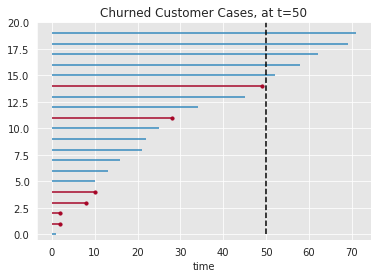

In [9]:
from lifelines.plotting import plot_lifetimes

ax = plot_lifetimes(churn_dataSample['tenure'],event_observed = churn_dataSample['Churn - Yes'])
ax.vlines(50, 0, 50, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Churned Customer Cases, at t=50")


In [10]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

kmf.fit(durations = churn_data['tenure'], event_observed = churn_data['Churn - Yes'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

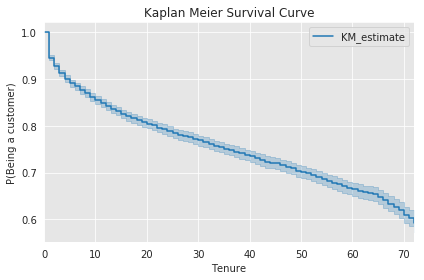

In [13]:
kmf.plot(ci_show=True)
plt.title('Kaplan Meier Survival Curve')
plt.ylabel('P(Being a customer)')
plt.xlabel('Tenure')
plt.tight_layout()
plt.savefig(firstDemoImage)
plt.show()

In [37]:
print("We output the Event occurence table over time 'event_at'")

kmf.event_table.head()

We output the Event occurence table over time 'event_at'


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,11,0,11,7043,7043
1,613,380,233,0,7032
2,238,123,115,0,6419
3,200,94,106,0,6181
4,176,83,93,0,5981


In [38]:
print("As another part of the functionality with Lifelines are" +
      "conveniently printing out statistical information as Dataframes")
kmf.confidence_interval_.head()

As another part of the functionality with Lifelines areconveniently printing out statistical information as Dataframes


,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.940418,0.951002
2.0,0.921506,0.933672
3.0,0.906857,0.920108
4.0,0.893733,0.907879


### What about Regression?



Survival regression allows us to regress other feature against another variable--this case durations. This regression is particularly different in that:

* It abides to characteristic of censoring, compared to traditional Linear Regression
* Though it can operate like traditional linear regression, itt is used to explore the relationship between the 'survival' of person and characteristics
    * Predict the survivability through the model, as opposed to predicting estimations 
* All models attempt to represent the hazard rate $h(t|x_i)$ for some $i=1....n$ 


An example of this implementation will be covered in a future talk.

However, there are example of implementing [Survival Regression in the Lifelines documentation](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#survival-regression).

## <center> With that being said </center>

## <center> Thank you, </center>

<img src="resources/images/BayPiggies.png" alt="BayPiggies" class="right">

* [RaulingAverage.dev](https://raulingaverage.dev/)
* [Twitter: @RaulingAverage](https://twitter.com/RaulingAverage)
* [Notebook @ CloudChaoszero/Presentations/BayPiggies/Survival-Analysis](https://github.com/CloudChaoszero/Presentations/tree/master/BayPiggies/Survival-Analysis)

# Resources

* [DataSource](https://github.com/CamDavidsonPilon/lifelines/blob/master/examples/Customer%20Churn.ipynb)  

* There is an R implementation called [Survival](https://www.emilyzabor.com/tutorials/survival_analysis_in_r_tutorial.html)
* There is a Sci-kit Learn equivalent called [Scikit-Survival](https://readthedocs.org/projects/scikit-survival/)

### Hazard Function

The hazard function $h(t)$, is the instantaneous rate at which events occur, given no previous events.

$h(t) = \lim_{\Delta t \rightarrow 0} \tfrac{Pr(t < T \leq t + \Delta{t} | T>t)}{\Delta t}$ $=\tfrac{f(t)}{S(t)}$

The cumulative hazard describes the accumulated risk up to time t, $H(t) = \int^{t}_{0} h(u) du$

> A more constructive proof of the hazard function can be found [here (via SFU)](http://people.stat.sfu.ca/~raltman/stat402/402L32.pdf)